### Round 3 Analysis

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import csv

In [5]:
path1 = f"./data/round_3/prices_round_3_day_0.csv"
path2 = f"./data/round_3/prices_round_3_day_1.csv"
path3 = f"./data/round_3/prices_round_3_day_2.csv"
# results_path = f"./data/round_3/algo_results.csv"

In [6]:
data1 = pd.read_csv(path1, delimiter=";", parse_dates=True)
data2 = pd.read_csv(path2, delimiter=";", parse_dates=True)
data3 = pd.read_csv(path3, delimiter=";", parse_dates=True)
# results_data = pd.read_csv(results_path, delimiter=";", parse_dates=True)

In [7]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2,999800,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,69542.0,0.0
119996,2,999900,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0
119997,2,999900,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,69556.0,0.0
119998,2,999900,STRAWBERRIES,3984,240,NaN,NaN,NaN,NaN,3985,92,3986.0,148.0,NaN,NaN,3984.5,0.0


In [11]:
# data1["premium"] = data1["GIFT_BASKET"] - 4*data1["CHOCOLATE"] - 6*data1["STRAWBERRIES"] - data1["ROSES"]
data1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,999800,GIFT_BASKET,71131,19,71130.0,21.0,NaN,NaN,71145,19,71146.0,21.0,NaN,NaN,71138.0,0.0
39996,0,999900,CHOCOLATE,7987,124,NaN,NaN,NaN,NaN,7989,124,NaN,NaN,NaN,NaN,7988.0,0.0
39997,0,999900,GIFT_BASKET,71117,2,71116.0,16.0,71115.0,18.0,71128,2,71130.0,16.0,71131.0,18.0,71122.5,0.0
39998,0,999900,ROSES,14550,18,14549.0,46.0,NaN,NaN,14551,64,NaN,NaN,NaN,NaN,14550.5,0.0


In [36]:
# data_category_range = ['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET']

# for i,value in enumerate(['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET']):
# print(data1[data1['product'] == 'GIFT_BASKET']['mid_price'] - data1[data1['product'] == 'CHOCOLATE']['mid_price'])
# print(data1[data1['product'] == 'GIFT_BASKET']['mid_price'] - 4*data1[data1['product'] == 'CHOCOLATE']['mid_price'] - 6*data1[data1['product'] == 'STRAWBERRIES']['mid_price'] - data1[data1['product'] == 'ROSE']['mid_price'])


In [16]:
file_choco1 = f"./data/round_3/product_CHOCOLATE.csv"
file_straw1 = f"./data/round_3/product_STRAWBERRIES.csv"
file_rose1 = f"./data/round_3/product_ROSES.csv"
file_basket1 = f"./data/round_3/product_GIFT_BASKET.csv"

In [33]:
choco1 = pd.read_csv(file_choco1, delimiter=",", parse_dates=True)
straw1 = pd.read_csv(file_straw1, delimiter=",", parse_dates=True)
rose1 = pd.read_csv(file_rose1, delimiter=",", parse_dates=True)
basket1 = pd.read_csv(file_basket1, delimiter=",", parse_dates=True)

In [34]:
choco1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,100,CHOCOLATE,8001,52,8000.0,95.0,NaN,NaN,8002,147,NaN,NaN,NaN,NaN,8001.5,0.0
2,0,200,CHOCOLATE,8000,152,NaN,NaN,NaN,NaN,8002,152,NaN,NaN,NaN,NaN,8001.0,0.0
3,0,300,CHOCOLATE,8002,44,8001.0,84.0,NaN,NaN,8003,128,NaN,NaN,NaN,NaN,8002.5,0.0
4,0,400,CHOCOLATE,8001,118,NaN,NaN,NaN,NaN,8003,118,NaN,NaN,NaN,NaN,8002.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,999500,CHOCOLATE,7987,60,7986.0,73.0,NaN,NaN,7988,133,NaN,NaN,NaN,NaN,7987.5,0.0
9996,0,999600,CHOCOLATE,7988,124,NaN,NaN,NaN,NaN,7989,51,7990.0,73.0,NaN,NaN,7988.5,0.0
9997,0,999700,CHOCOLATE,7987,138,NaN,NaN,NaN,NaN,7988,54,7989.0,84.0,NaN,NaN,7987.5,0.0
9998,0,999800,CHOCOLATE,7989,38,7988.0,81.0,NaN,NaN,7990,38,7991.0,81.0,NaN,NaN,7989.5,0.0


In [38]:
basket1['premium'] = basket1['mid_price'] - 4*choco1['mid_price'] - 6*straw1['mid_price'] - rose1['mid_price']

In [39]:
basket1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,premium
0,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0,355.0
1,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0,346.5
2,0,200,GIFT_BASKET,71344,4,71339.0,1.0,71338.0,14.0,71350,1,71351.0,14.0,71352.0,21.0,71347.0,0.0,345.5
3,0,300,GIFT_BASKET,71345,2,71343.0,11.0,71342.0,29.0,71356,2,71357.0,11.0,71358.0,29.0,71350.5,0.0,343.5
4,0,400,GIFT_BASKET,71336,2,71335.0,13.0,71334.0,25.0,71347,2,71348.0,13.0,71349.0,25.0,71341.5,0.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,999500,GIFT_BASKET,71135,12,71134.0,19.0,NaN,NaN,71148,12,71149.0,19.0,NaN,NaN,71141.5,0.0,462.0
9996,0,999600,GIFT_BASKET,71132,2,71131.0,11.0,71130.0,19.0,71137,8,71143.0,2.0,71144.0,11.0,71134.5,0.0,446.5
9997,0,999700,GIFT_BASKET,71123,2,71122.0,11.0,71121.0,23.0,71134,2,71135.0,11.0,71136.0,23.0,71128.5,0.0,446.0
9998,0,999800,GIFT_BASKET,71131,19,71130.0,21.0,NaN,NaN,71145,19,71146.0,21.0,NaN,NaN,71138.0,0.0,447.5


<Axes: >

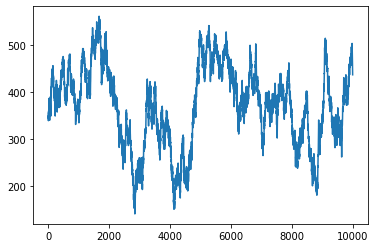

In [40]:
basket1['premium'].plot()

In [42]:
sum(basket1['premium'])/9999

370.2676267626763

# So we are going to assume a basket premium of 370